# CIFAR-10 Classification with CNN
This notebook demonstrates how to train a convolutional neural network (CNN) on the CIFAR-10 dataset using TensorFlow/Keras.

In [6]:

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from utils import Dataset  # Ensure this contains the Dataset class
    

## Class Names

In [7]:

CLASSES = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    

## Load and Preprocess Data

In [8]:

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
train = Dataset(x_train, y_train)
test = Dataset(x_test, y_test)

print(f"Train shape: {train.x.shape}, {train.y.shape}")
print(f"Test shape: {test.x.shape}, {test.y.shape}")

# Normalize data
train.x = train.x.astype('float32') / 255.0
test.x = test.x.astype('float32') / 255.0
    

Train shape: (50000, 32, 32, 3), (50000, 1)
Test shape: (10000, 32, 32, 3), (10000, 1)


## Define the CNN Model

In [9]:

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
    

## Train the Model

In [10]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Configurar os callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Atualizar o nome do arquivo para o novo formato (.keras)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Treinar o modelo com callbacks
history = cnn.fit(
    train.x, train.y,
    validation_data=(test.x, test.y),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop, model_checkpoint]
)


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.3967 - loss: 1.6575 - val_accuracy: 0.5765 - val_loss: 1.1930
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6096 - loss: 1.1072 - val_accuracy: 0.6500 - val_loss: 1.0106
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6691 - loss: 0.9543 - val_accuracy: 0.6643 - val_loss: 0.9769
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6945 - loss: 0.8813 - val_accuracy: 0.6660 - val_loss: 0.9646
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7196 - loss: 0.8074 - val_accuracy: 0.6896 - val_loss: 0.9122
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7389 - loss: 0.7503 - val_accuracy: 0.6922 - val_loss: 0.9072
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7566 - loss: 0.6961 - val_accuracy: 0.6858 - val_loss: 0.9315
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7738 - loss: 0

## Evaluate the Model

In [11]:

test_loss, test_acc = cnn.evaluate(test.x, test.y)
print(f"Test accuracy: {test_acc}, Test loss: {test_loss}")
    

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7058 - loss: 0.9018
Test accuracy: 0.7044000029563904, Test loss: 0.9016035199165344


## Visualize Training Results

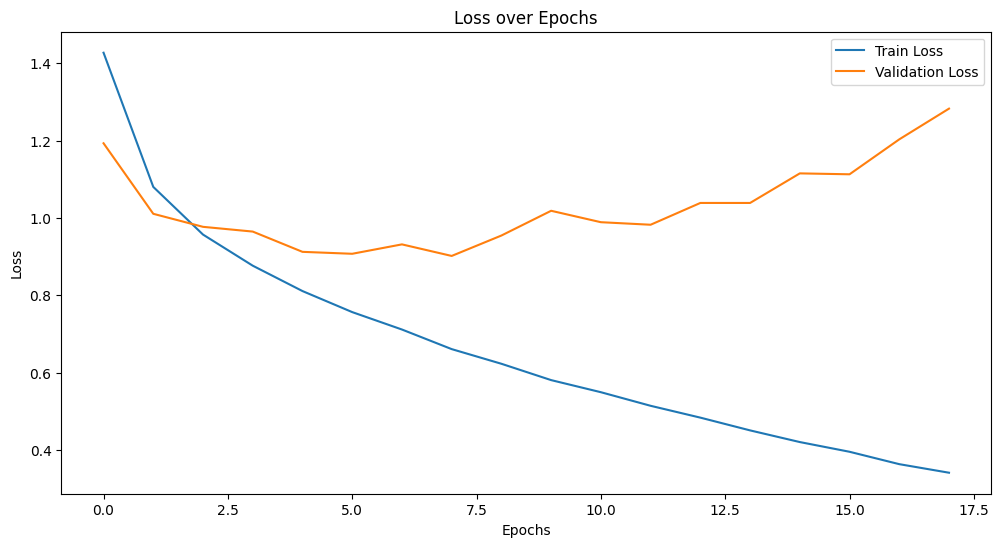

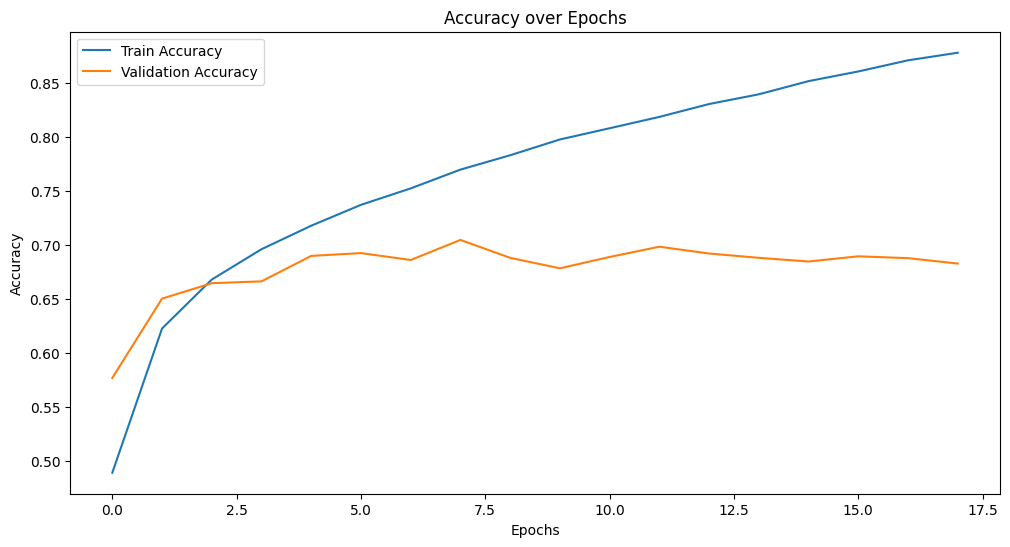

In [12]:

# Plot loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
    

## Make Predictions

In [13]:

predictions = cnn.predict(test.x)
predicted_classes = np.argmax(predictions, axis=1)

# Display first 5 predictions
for i in range(5):
    print(f"Image {i+1}: True Class = {CLASSES[test.y[i][0]]}, Predicted Class = {CLASSES[predicted_classes[i]]}")
    

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Image 1: True Class = cat, Predicted Class = cat
Image 2: True Class = ship, Predicted Class = ship
Image 3: True Class = ship, Predicted Class = ship
Image 4: True Class = airplane, Predicted Class = airplane
Image 5: True Class = frog, Predicted Class = deer


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


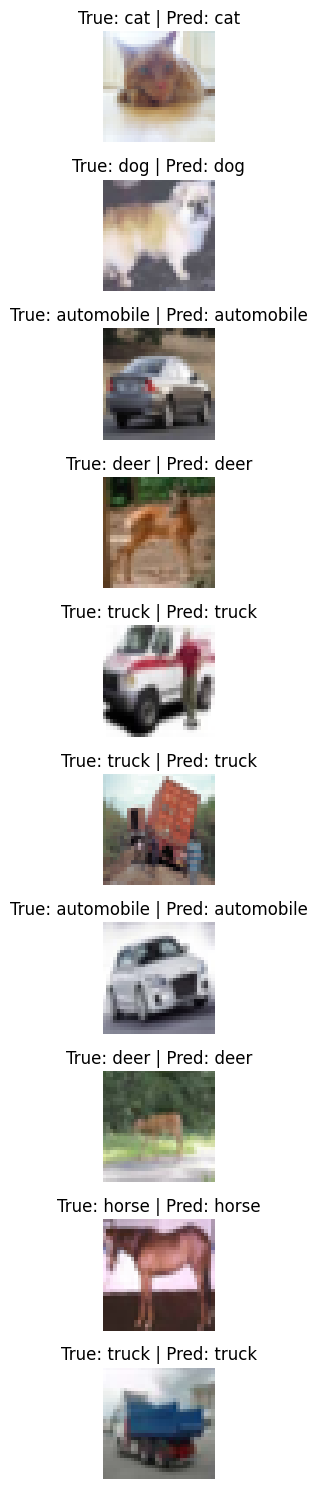

In [ ]:
predictions = cnn.predict(test.x)
predicted_classes = np.argmax(predictions, axis=1)

# Número de imagens a exibir
num_images = 5

# Selecionar índices aleatórios
random_indices = np.random.choice(len(test.x), num_images, replace=False)

# Criar o gráfico com as imagens empilhadas
plt.figure(figsize=(5, 15))  # Ajustar o tamanho da figura para acomodar as imagens verticalmente

for i, idx in enumerate(random_indices):
    # Criar um subplot para cada imagem
    plt.subplot(num_images, 1, i + 1)
    plt.imshow(test.x[idx])
    plt.axis('off')  # Remover os eixos
    
    # Adicionar o rótulo verdadeiro e o previsto como título
    true_label = CLASSES[test.y[idx][0]]
    predicted_label = CLASSES[predicted_classes[idx]]
    plt.title(f"True: {true_label} | Pred: {predicted_label}", fontsize=12)

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Gerar matriz de confusão
conf_matrix = confusion_matrix(test.y, predicted_classes)

# Plotar matriz de confusão
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=CLASSES, yticklabels=CLASSES)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Exibir relatório de classificação
report = classification_report(test.y, predicted_classes, target_names=CLASSES)
print(report)


ModuleNotFoundError: No module named 'seaborn'